# CSCI6380 Data Mining - Final Project
## Kun-Lin Ho, Corey Schultz, Adnan Kivanc Corut
__________________

## 1. Data Preprocessing - Kun-Lin
### 1.1. Define Functions for Data Preprocessing

In [2]:
## Import libraries
%matplotlib inline
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
from tensorflow.keras import backend
from keras import backend as K
import tensorflow as tf
import random
import collections
from keras.layers import Dropout
from keras.models import Sequential 
from keras.layers import Dense 
from pathlib import Path
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from six import StringIO
from copy import copy
from scipy import stats
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

def encodeWithBLOSUM62(amino_acids):
    ## a function that returns the blosum62 vector given a certain aa 
    return list(BLOSUM62_MATRIX[amino_acids].values)

def blosumEncoding(data):
    ## a function that creates amino acid sequence that encode by blosum62 matrix 
    total_data_row =[]
    for each in data:
    
        eachrow =[]
        for aa in each:
            eachrow = eachrow+ encodeWithBLOSUM62(aa)
    
        total_data_row.append(eachrow)
    
    return pd.DataFrame(total_data_row)

def split(word): 
    return [char for char in word] 

COMMON_AMINO_ACIDS = collections.OrderedDict(sorted({
   "A": "Alanine",
   "R": "Arginine",
   "N": "Asparagine",
   "D": "Aspartic Acid",
   "C": "Cysteine",
   "E": "Glutamic Acid",
   "Q": "Glutamine",
   "G": "Glycine",
   "H": "Histidine",
   "I": "Isoleucine",
   "L": "Leucine",
   "K": "Lysine",
   "M": "Methionine",
   "F": "Phenylalanine",
   "P": "Proline",
   "S": "Serine",
   "T": "Threonine",
   "W": "Tryptophan",
   "Y": "Tyrosine",
   "V": "Valine",
   }.items()))
COMMON_AMINO_ACIDS_WITH_UNKNOWN = copy(COMMON_AMINO_ACIDS)
COMMON_AMINO_ACIDS_WITH_UNKNOWN["X"] = "Unknown"
   
AMINO_ACID_INDEX = dict((letter, i) for (i, letter) in enumerate(COMMON_AMINO_ACIDS_WITH_UNKNOWN))

AMINO_ACIDS = list(COMMON_AMINO_ACIDS_WITH_UNKNOWN.keys())
   
BLOSUM62_MATRIX = pd.read_csv(StringIO("""
  A  R  N  D  C  Q  E  G  H  I  L  K  M  F  P  S  T  W  Y  V  X
   A  4 -1 -2 -2  0 -1 -1  0 -2 -1 -1 -1 -1 -2 -1  1  0 -3 -2  0  0
   R -1  5  0 -2 -3  1  0 -2  0 -3 -2  2 -1 -3 -2 -1 -1 -3 -2 -3  0
   N -2  0  6  1 -3  0  0  0  1 -3 -3  0 -2 -3 -2  1  0 -4 -2 -3  0
   D -2 -2  1  6 -3  0  2 -1 -1 -3 -4 -1 -3 -3 -1  0 -1 -4 -3 -3  0
   C  0 -3 -3 -3  9 -3 -4 -3 -3 -1 -1 -3 -1 -2 -3 -1 -1 -2 -2 -1  0
   Q -1  1  0  0 -3  5  2 -2  0 -3 -2  1  0 -3 -1  0 -1 -2 -1 -2  0
   E -1  0  0  2 -4  2  5 -2  0 -3 -3  1 -2 -3 -1  0 -1 -3 -2 -2  0
   G  0 -2  0 -1 -3 -2 -2  6 -2 -4 -4 -2 -3 -3 -2  0 -2 -2 -3 -3  0
   H -2  0  1 -1 -3  0  0 -2  8 -3 -3 -1 -2 -1 -2 -1 -2 -2  2 -3  0
   I -1 -3 -3 -3 -1 -3 -3 -4 -3  4  2 -3  1  0 -3 -2 -1 -3 -1  3  0
   L -1 -2 -3 -4 -1 -2 -3 -4 -3  2  4 -2  2  0 -3 -2 -1 -2 -1  1  0
   K -1  2  0 -1 -3  1  1 -2 -1 -3 -2  5 -1 -3 -1  0 -1 -3 -2 -2  0
   M -1 -1 -2 -3 -1  0 -2 -3 -2  1  2 -1  5  0 -2 -1 -1 -1 -1  1  0
   F -2 -3 -3 -3 -2 -3 -3 -3 -1  0  0 -3  0  6 -4 -2 -2  1  3 -1  0
   P -1 -2 -2 -1 -3 -1 -1 -2 -2 -3 -3 -1 -2 -4  7 -1 -1 -4 -3 -2  0
   S  1 -1  1  0 -1  0  0  0 -1 -2 -2  0 -1 -2 -1  4  1 -3 -2 -2  0
   T  0 -1  0 -1 -1 -1 -1 -2 -2 -1 -1 -1 -1 -2 -1  1  5 -2 -2  0  0 
   W -3 -3 -4 -4 -2 -2 -3 -2 -2 -3 -2 -3 -1  1 -4 -3 -2 11  2 -3  0
   Y -2 -2 -2 -3 -2 -1 -2 -3  2 -1 -1 -2 -1  3 -3 -2 -2  2  7 -1  0
   V  0 -3 -3 -3 -1 -2 -2 -3 -3  3  1 -2  1 -1 -2 -2  0 -3 -1  4  0
   X  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1
   """), sep='\s+').loc[AMINO_ACIDS, AMINO_ACIDS].astype("int8")
assert (BLOSUM62_MATRIX == BLOSUM62_MATRIX.T).all().all() 

def makeSameLength(each_peptide):
    first = each_peptide
    middle = each_peptide.center(15,"X")
    end = ''
    
    while len(first) < 15:
        first +='X'
        end+='X' 
    end = end + each_peptide[-len(each_peptide):]
    return first+middle+end

Using TensorFlow backend.


### 1.2. Import the Dataset

In [3]:
## Data preprocessing, importing the dataset
## need to change the file location
workdir = Path(os.path.abspath(os.getcwd()))
               #'/Volumes/Research/MAC_Research_Data/UGA/3Fall/DataMining6380/Mini_projecct_2/')
dataset = pd.read_csv(workdir/"HLA-A-01_full_length.txt",sep='\t')
peptides = dataset.peptide.values
final_peptide = [split(makeSameLength(each_peptide)) for each_peptide in peptides]

### 1.3. Train Test Split for Unbalanced Data

In [94]:
# ## encode y label
# from sklearn import preprocessing
# y = dataset.Binder.values
# le = preprocessing.LabelEncoder()
# a = le.fit(y)
# y= le.transform(y)

# ## encode x label using bl62 matrix
# X = blosumEncoding(final_peptide).values
# ## to see the dataset distribution 
# dataset.groupby('Binder').size()
# # Splitting the dataset into the Training set and Test set
# from sklearn.model_selection import train_test_split 
# val_size = 0.1
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, shuffle= True,stratify = y)
# X_train, X_val, y_train, y_val =  train_test_split(X_train, y_train, test_size=val_size, random_state = 0, shuffle=True)


### 1.4. Balancing the Dataset

In [4]:
from sklearn.utils import resample
## balance the class and create a new dataframe
Binder_max_count = dataset.groupby(['Binder']).count().max()[0]
Binders = dataset.Binder.unique()
Binders = np.delete(Binders, np.where(Binders == True), axis =0 )
# df_majority = dataset[dataset.Binder ==True]
df_majority = dataset[dataset['Binder']==True]
for binder in Binders:
    df_minority_upsampled = resample(dataset[dataset['Binder']==False], 
                            replace=True,     # sample with replacement
                            n_samples=Binder_max_count,    # to match majority class
                            random_state=42) # reproducible results
    df_majority = pd.concat([df_majority, df_minority_upsampled])
    
df_majority.groupby('Binder').size()

Binder
False    8873
True     8873
dtype: int64

### 1.5. Traint Test Split for Balanced Data

In [5]:
from sklearn import preprocessing
## Balance the classes
peptides = df_majority.peptide.values
final_peptide = [split(makeSameLength(each_peptide)) for each_peptide in peptides]

y = df_majority.Binder.values
le = preprocessing.LabelEncoder()
a = le.fit(y)
y= le.transform(y)

## encode x label using bl62 matrix
X = blosumEncoding(final_peptide).values
## to see the df_majority distribution 
df_majority.groupby('Binder').size()
# Splitting the df_majority into the Training set and Test set
from sklearn.model_selection import train_test_split 
val_size = 0.1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, shuffle= True,stratify = y)
X_train, X_val, y_train, y_val =  train_test_split(X_train, y_train, test_size=val_size, random_state = 0, shuffle=True)

___________________

## 2. Create the Ensemble Neural Network - Kun-Lin

In [6]:
# Create an ensemble Neural Network in Keras
seed = 7
np.random.seed(seed)
## Create an ANN model
# Training the model
# Dense object will take care to initialize the random number close to 0 ( first ANN step)
classifier = Sequential() # use the sequential layer
classifier.add(Dense(units = 80, kernel_initializer = 'uniform', activation = 'tanh', input_dim = 945))
classifier.add(Dropout(rate = 0.5))
classifier.add(Dense(units = 80,  kernel_initializer = 'uniform', activation = 'tanh', input_dim = 945))
classifier.add(Dropout(rate = 0.5))
classifier.add(Dense(units = 80,   kernel_initializer = 'uniform', activation = 'tanh', input_dim = 945))
## here is the output layer
## if we deal with more than 2 categories, the activation function needs to use softmax
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
opt = keras.optimizers.rmsprop(learning_rate= 0.001)
# Compiling the ANN
classifier.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training set
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience= 50)
# check the model performance and save the best model
mc = ModelCheckpoint(
    '/Users/kivanc/Data_Mining_Final_Project/Final_best_50_batch_model.h5', monitor='val_loss', mode='min', save_best_only=True)
    #'/Volumes/Research/MAC_Research_Data/UGA/3Fall/DataMining6380/Mini_projecct_2/Minproject2best_50batch_model.h5', monitor='val_loss', mode='min', save_best_only=True)

classifier.summary()

history = classifier.fit(X_train, y_train, validation_data= (X_val,y_val), batch_size = 50, epochs = 200, callbacks = [mc,es])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 80)                75680     
_________________________________________________________________
dropout_1 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 80)                6480      
_________________________________________________________________
dropout_2 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 80)                6480      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 81        
Total params: 88,721
Train

In [7]:
## Stratified Kfold with Keras
## if your computer is not mac, the n_jobs = 1 or you
seed = 7
np.random.seed(seed)
def build_classifier(activation='tanh', dropout_rate=0.5, init_mode='uniform', learn_rate=0.001, neurons=80, optimizer=''):
    classifier = Sequential() # use the sequential layer
    ## init = kernel_initializer
    classifier.add(Dense(units = neurons, kernel_initializer = init_mode, activation = activation, input_dim = 945))
    classifier.add(Dropout(p = dropout_rate))
    classifier.add(Dense(units = 80,  kernel_initializer = 'uniform', activation = 'tanh', input_dim = 945))
    classifier.add(Dropout(p = 0.5))
    classifier.add(Dense(units = 80,  kernel_initializer = 'uniform', activation = 'tanh', input_dim = 945))
    ## if we deal with more than 2 categories, the activation function needs to use softmax
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    opt = keras.optimizers.rmsprop(learning_rate= learn_rate)
    # simple early stopping
    es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience= 50)    
    # Compiling the ANN
    classifier.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier


classifier = KerasClassifier(build_fn = build_classifier, batch_size=50, epochs = 200)


___________________________

___________________________

## 3. Hyperparameter Tunning (GridSearchCV & RandomSearchCV) - Kivanc
### 3.1. Neural Net Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

## Fix random seed for reproducibility
seed = 7
np.random.seed(seed)

## Create/get model
nn_clf = classifier

## Define the grid search parameters
## Source: https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/
batch_size = [10, 50, 100] # The batch size in iterative gradient descent is the number of patterns shown to the network before the weights are updated.
epochs = [10, 50, 200] # The number of epochs is the number of times that the entire training dataset is shown to the network during training.
optimizer = ['SGD', 'RMSprop', 'Adam'] # Algorithms to change the attributes of the neural network such as weights and learning rate in order to reduce the losses.
learn_rate = [0.001, 0.01, 0.1] # Learning rate controls how much to update the weight at the end of each batch.
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9] # Momentum controls how much to let the previous update influence the current weight update.
init_mode = ['uniform','normal', 'zero'] # Network weight initialization methods
activation = ['relu', 'tanh', 'sigmoid'] # The activation function controls the non-linearity of individual neurons and when to fire.
weight_constraint = [1, 2, 3, 4, 5]
dropout_rate = [0.1, 0.25, 0.5] # Tune the dropout rate for regularization in an effort to limit overfitting and improve the model’s ability to generalize.
neurons = [10, 50, 80] # Generally the number of neurons in a layer controls the representational capacity of the network

params_nn = {'optimizer': optimizer,
        'learn_rate': learn_rate,
        # 'momentum': momentum,
        'init_mode': init_mode,
        'activation': activation,
        # 'weight_constraint': weight_constraint,
        'dropout_rate': dropout_rate,
        'neurons': neurons}

## Perform GridSearchCV
gridsearch_nn = GridSearchCV(nn_clf, params_nn, cv = 3, verbose=5, n_jobs=-1)
grid_result_nn = gridsearch_nn.fit(X_train, y_train)

## summarize results
print("Best: %f using %s" % (grid_result_nn.best_score_, grid_result_nn.best_params_))
means = grid_result_nn.cv_results_['mean_test_score']
stds = grid_result_nn.cv_results_['std_test_score']
params = grid_result_nn.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [65]:
## Print best parameters and best score
print("Best: %f using %s" % (grid_result_nn.best_score_, grid_result_nn.best_params_))

Best: 0.921486 using {'activation': 'tanh', 'dropout_rate': 0.5, 'init_mode': 'uniform', 'learn_rate': 0.001, 'neurons': 80, 'optimizer': 'SGD'}


### 3.2. Random Forest Grid Search

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

## Fix random seed for reproducibility
seed = 7
np.random.seed(seed)

## Create/get model
rf_clf = RandomForestClassifier()

## Define the grid search parameters
n_estimators= [100, 200, 500, 1000] # The number of trees
max_features = ['auto', 'sqrt', 'log2'] # The most important parameter is the number of random features to sample at each split point (max_features)
max_depth= [10, 25, 50, 100] # Max number of levels in each decision tree
min_samples_split = [2, 5, 10] # Min number of data points placed in a node before the node is split
min_samples_leaf = [1, 2, 4] # Min number of data points allowed in a leaf node
criterion = ['gini', 'entropy'] # The function used to evaluate the quality of a split.
max_leaf_nodes = [50, 100, 200] # This hyperparameter sets a condition on the splitting of the nodes in the tree and hence restricts the growth of the tree.

params_rf = {'n_estimators': n_estimators,
        'max_features': max_features,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'bootstrap': [True],
        'criterion': criterion,
        'max_leaf_nodes': max_leaf_nodes}

## Perform GridSearchCV
gridsearch_rf = GridSearchCV(rf_clf, params_rf, cv = 3, verbose=1, n_jobs=-1)
grid_result_rf = gridsearch_rf.fit(X_train, y_train)

## Summarize results
print("Best: %f using %s" % (grid_result_rf.best_score_, grid_result_rf.best_params_))
means = grid_result_rf.cv_results_['mean_test_score']
stds = grid_result_rf.cv_results_['std_test_score']
params = grid_result_rf.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 3 folds for each of 2592 candidates, totalling 7776 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   56.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed: 28.6min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed: 41.6min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed: 60.3min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed: 80.1min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed: 101.0min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed: 127.0min
[Parallel(n_jobs=-1)]: Done 4976 tasks      | elapsed: 160.0min
[Parallel(n_jobs=-1)]: Done 6026 tasks      | elapsed: 198.0min
[Parallel(n_jobs=-1)]: Done 7176 tasks      | elapsed: 236.3min
[Parallel(n_jobs=-1)]: Done 7776 out of 7776 | elapsed: 252.1min finished
Best: 0.924860 using {'boot

In [40]:
## Print best parameters and best score
print("Best: %f using %s" % (grid_result_rf.best_score_, grid_result_rf.best_params_))

Best: 0.924860 using {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 50, 'max_features': 'sqrt', 'max_leaf_nodes': 200, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


### 3.3. XGBoost Grid Search

In [16]:
from xgboost import XGBClassifier

## Fix random seed for reproducibility
seed = 7
np.random.seed(seed)

## Create/get model
xgb_clf = XGBClassifier()

## Define the grid search parameters
## Source: https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
min_child_weight = [1, 3, 5] # The minimum weight (or number of samples if all samples have a weight of 1) required in order to create a new node in the tree.
#gamma = [0.0, 0.1, 0.2]
subsample = [0.3, 0.5, 0.7] # The number of samples used to fit each tree (a fraction of the training dataset size)
colsample_bytree = [0.3, 0.5, 0.7] # The number of features used by each tree (fraction)
max_depth = [3, 5, 7, 10] # The size of decision trees, also called the number of layers or the depth
n_estimators = [50, 100, 200] # The number of decision trees used in the ensemble.
# reg_alpha = [1.1, 1.2, 1.3]
# reg_lambda = [1.1, 1.2, 1.3]
learning_rate = [0.1, 0.01, 0.05] # Learning rate controls the amount of contribution that each model has on the ensemble prediction.

params_xgb = {'min_child_weight': min_child_weight,
        # 'gamma': gamma,
        'max_depth': max_depth,
        'subsample': subsample,
        'colsample_bytree': colsample_bytree,
        'n_estimators': n_estimators,
        # 'reg_alpha': reg_alpha,
        # 'reg_lambda': reg_lambda,
        'learning_rate': learning_rate}

## Perform GridSearchCV
gridsearch_xgb = GridSearchCV(xgb_clf, params_xgb, cv = 3, verbose=1, n_jobs=-1)
grid_result_xgb = gridsearch_xgb.fit(X_train, y_train)

## Summarize results
print("Best: %f using %s" % (grid_result_xgb.best_score_, grid_result_xgb.best_params_))
means = grid_result_xgb.cv_results_['mean_test_score']
stds = grid_result_xgb.cv_results_['std_test_score']
params = grid_result_xgb.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 3 folds for each of 972 candidates, totalling 2916 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   42.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed: 33.1min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed: 57.1min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed: 91.8min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed: 144.9min
[Parallel(n_jobs=-1)]: Done 2916 out of 2916 | elapsed: 194.5min finished
Best: 0.940044 using {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.7}
0.894881 (0.003909) with: {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 0.3}
0.892846 (0.002172) with: {'colsample_bytree': 0

In [75]:
## Print best parameters and best score
print("Best: %f using %s" % (grid_result_xgb.best_score_, grid_result_xgb.best_params_))

Best: 0.926048 using {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.7}


#### 3.3.1. XGBoost Grid Search for Gama

In [17]:
xgb_clf_best = grid_result_xgb.best_estimator_

## Define the grid search parameters

gamma = [0.0, 0.1, 0.2, 0.3, 0.4, 1] # It controls regularization (or prevents overfitting)

# reg_alpha = [1.1, 1.2, 1.3]
# reg_lambda = [1.1, 1.2, 1.3]


params_xgb_2 = {'gamma': gamma}
        # 'reg_alpha': reg_alpha,
        # 'reg_lambda': reg_lambda}

## Perform GridSearchCV
gridsearch_xgb_2 = GridSearchCV(xgb_clf_best, params_xgb_2, cv = 3, verbose=1, n_jobs=-1)
grid_result_xgb_2 = gridsearch_xgb_2.fit(X_train, y_train)

## Summarize results
print("Best: %f using %s" % (gridsearch_xgb_2.best_score_, gridsearch_xgb_2.best_params_))

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  18 | elapsed:  3.9min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  3.9min finished
Best: 0.940592 using {'gamma': 0.1}


### 3.4. AdaBoost Classifier Grid Search

In [18]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

## Fix random seed for reproducibility
seed = 7
np.random.seed(seed)

## Create/get model
ab_clf = AdaBoostClassifier()

## Define the grid search parameters
## Source: https://machinelearningmastery.com/adaboost-ensemble-in-python/
n_estimators = [50, 100, 200, 500] # The number of decision trees used in the ensemble.
learning_rate = [0.001, 0.01, 0.1, 1.0] # Learning rate controls the contribution of each model to the ensemble prediction
base_estimator = [DecisionTreeClassifier(), RandomForestClassifier()] # The base model


params_ab = {'n_estimators': n_estimators,
        'learning_rate': learning_rate,
        'base_estimator': base_estimator}

## Perform GridSearchCV
gridsearch_ab = GridSearchCV(ab_clf, params_ab, cv = 3, verbose=1, n_jobs=-1)
grid_result_ab = gridsearch_ab.fit(X_train, y_train)

## Summarize results
print("Best: %f using %s" % (grid_result_ab.best_score_, grid_result_ab.best_params_))
means = grid_result_ab.cv_results_['mean_test_score']
stds = grid_result_ab.cv_results_['std_test_score']
params = grid_result_ab.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed: 28.7min
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed: 207.9min finished
Best: 0.941061 using {'base_estimator': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), 'learning_rate': 0.01, 'n_estimators': 500}
0.913431 (0.000448) with: {'base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=

In [15]:
## Print best parameters and best score
print("Best: %f using %s" % (grid_result_ab.best_score_, grid_result_ab.best_params_))

Best: 0.922464 using {'base_estimator': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), 'learning_rate': 0.01, 'n_estimators': 200}


### 3.5. Random Forest Random Search CV

In [35]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

## Fix random seed for reproducibility
seed = 7
np.random.seed(seed)

## Create/get model
rf_clf = RandomForestClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

## Define the grid search parameters
n_estimators= [100, 200, 500, 1000] # The number of trees
max_features = ['auto', 'sqrt', 'log2'] # The most important parameter is the number of random features to sample at each split point (max_features)
criterion = ['gini', 'entropy'] # The function used to evaluate the quality of a split.

params_rf = {'n_estimators': n_estimators,
        'max_features': max_features,
        'bootstrap': [True],
        'criterion': criterion}

# define search
randsearch_rf= RandomizedSearchCV(rf_clf, params_rf, n_iter=25, scoring='accuracy', n_jobs=-1, 
cv=cv, random_state=1, verbose=1)
# execute search
randsearch_result_rf = randsearch_rf.fit(X_train, y_train)
# summarize result
print('Best Score: %s' % randsearch_result_rf.best_score_)
print('Best Hyperparameters: %s' % randsearch_result_rf.best_params_)

Fitting 30 folds for each of 24 candidates, totalling 720 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   36.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed: 22.4min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 38.6min finished
Best Score: 0.9471138586500295
Best Hyperparameters: {'n_estimators': 200, 'max_features': 'log2', 'criterion': 'entropy', 'bootstrap': True}


### 3.6. XGBoost Random Search CV

In [37]:
from xgboost import XGBClassifier

## Fix random seed for reproducibility
seed = 7
np.random.seed(seed)

## Create/get model
xgb_clf = XGBClassifier()

## Define the grid search parameters
## Source: https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
learning_rate = [0.01, 0.05, 0.1] # Learning rate controls the amount of contribution that each model has on the ensemble prediction.
n_estimators = [50, 100, 150, 200]
max_depth = [2, 4, 6, 8]

params_xgb = {'max_depth': max_depth,
        'n_estimators': n_estimators,
        'learning_rate': learning_rate}

# define search
randsearch_xgb= RandomizedSearchCV(xgb_clf, params_xgb, n_iter=25, scoring='accuracy', n_jobs=-1,
cv=cv, random_state=1, verbose=1)
# execute search
randsearch_result_xgb = randsearch_xgb.fit(X_train, y_train)

# summarize result
print('Best Score: %s' % randsearch_result_xgb.best_score_)
print('Best Hyperparameters: %s' % randsearch_result_xgb.best_params_)

Fitting 30 folds for each of 25 candidates, totalling 750 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed: 22.3min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed: 79.6min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed: 129.2min finished
Best Score: 0.947896535511103
Best Hyperparameters: {'n_estimators': 200, 'max_depth': 8, 'learning_rate': 0.1}


### 3.7. AdaBoost Random Search CV

In [38]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

## Fix random seed for reproducibility
seed = 7
np.random.seed(seed)

## Create/get model
ab_clf = AdaBoostClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

## Define the grid search parameters
## Source: https://machinelearningmastery.com/adaboost-ensemble-in-python/
n_estimators = [10, 50, 100, 500] # The number of decision trees used in the ensemble.
learning_rate = [0.001, 0.01, 0.1, 1.0] # Learning rate controls the contribution of each model to the ensemble prediction


params_ab = {'n_estimators': n_estimators,
        'learning_rate': learning_rate}

# define search
randsearch_ab= RandomizedSearchCV(ab_clf, params_ab, n_iter=25, scoring='accuracy', n_jobs=-1,
cv=cv, random_state=1, verbose=1)
# execute search
randsearch_result_ab = randsearch_ab.fit(X_train, y_train)

# summarize result
print('Best Score: %s' % randsearch_result_ab.best_score_)
print('Best Hyperparameters: %s' % randsearch_result_ab.best_params_)

Fitting 30 folds for each of 16 candidates, totalling 480 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed: 20.8min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed: 58.7min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 75.2min finished
Best Score: 0.8997335385613372
Best Hyperparameters: {'n_estimators': 500, 'learning_rate': 1.0}


________________________________

_________________________

## 4. Stacking CV Classifier Using `mlxtend` - Kivanc
### 4.1. Classifiers = XGBoost, AdaBoost, NeuralNet | Meta Classifier = RandomForest (use_probas=True)

In [1]:
from mlxtend.plotting import plot_confusion_matrix 
from mlxtend.classifier import StackingCVClassifier 
from sklearn import model_selection

RANDOM_SEED = 42

## Create/define individual classifiers
XGBC = XGBClassifier(n_estimators= 200, max_depth= 8, learning_rate= 0.1)


ADBC = AdaBoostClassifier(n_estimators= 500, learning_rate= 1.0)

NN = classifier

rfc = RandomForestClassifier(n_estimators= 200, max_features= 'log2', criterion= 'entropy', bootstrap= True)

## Create StackingCVClassifier
kfold = model_selection.StratifiedKFold(n_splits=3, random_state=RANDOM_SEED)

clf_stack_1 = StackingCVClassifier(classifiers =[XGBC, ADBC, NN], 
                                   meta_classifier = rfc,  
                                   random_state=RANDOM_SEED, 
                                   n_jobs=-1, verbose=1,
                                   cv=kfold)

## Perform 3-fold cross validation
print('3-fold cross validation:\n')

kfold = model_selection.RepeatedStratifiedKFold(n_splits=3,  n_repeats=3, random_state=RANDOM_SEED)
for clf, label in zip([XGBC, ADBC, NN, clf_stack_1], 
                      ['XGBoost', 
                       'AdaBoost', 
                       'NeuralNet',
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, X, y, 
                                              cv=kfold, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

# ## Fit the model
# model_stack_1 = clf_stack_1.fit(X_train, y_train)
# pred_stack_1 = model_stack_1.predict(X_test) 

# ## Calculate and print accuracy
# acc_stack_1 = accuracy_score(y_test, pred_stack_1)  # evaluating accuracy 
# print('accuray score of Stacked model:', acc_stack_1 * 100)

NameError: name 'randsearch_xgb' is not defined

### 4.2. Classifiers = NeuralNet x 3 | Meta Classifier = XGBoost

In [ ]:
from mlxtend.classifier import StackingCVClassifier 

RANDOM_SEED = 42

## Create/define individual classifiers
NN = classifier

rfc = randsearch_rf.best_estimator_

## Create StackingCVClassifier
kfold = model_selection.StratifiedKFold(n_splits=3, random_state=RANDOM_SEED)

clf_stack_2 = StackingCVClassifier(classifiers =[NN, NN, NN], 
                                   meta_classifier = rfc,  
                                   random_state=RANDOM_SEED, 
                                   n_jobs=-1, verbose=1,
                                   cv=kfold)

## Perform 3-fold cross validation
print('3-fold cross validation:\n')

kfold = model_selection.RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=RANDOM_SEED)
for clf, label in zip([NN, clf_stack_2], 
                      ['NeuralNet',
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, X, y, 
                                              cv=kfold, 
                                              scoring='accuracy',
                                              n_jobs=-1)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

# ## Fit the model
# model_stack_2 = clf_stack_2.fit(X_train, y_train)
# pred_stack_2 = model_stack_2.predict(X_test) 

# ## Calculate and print accuracy
# acc_stack_2 = accuracy_score(y_test, pred_stack_2)  # evaluating accuracy 
# print('accuray score of Stacked model 2:', acc_stack_2 * 100)

______________________

_______________________

## 5. Create Stacked Ensemble for Deep Learning Neural Network - Corey
### 5.1. Fit the Model on Dataset

In [24]:
## Create a function that will define and fit an MLP model on the training dataset.
def fit_model(X_train, y_train):
    #define model
    classifier = Sequential() # use the sequential layer
    classifier.add(Dense(units = 80, kernel_initializer = 'uniform', activation = 'tanh', input_dim = 945))
    classifier.add(Dropout(rate = 0.5))
    classifier.add(Dense(units = 80,  kernel_initializer = 'uniform', activation = 'tanh', input_dim = 945))
    classifier.add(Dropout(rate = 0.5))
    classifier.add(Dense(units = 80,   kernel_initializer = 'uniform', activation = 'tanh', input_dim = 945))
    ## here is the output layer
    ## if we deal with more than 2 categories, the activation function needs to use softmax
    
    #I changed the output layer to have 2 units
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    opt = keras.optimizers.SGD(learning_rate= 0.001)
    # Compiling the ANN
    classifier.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])
    es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience= 50)
    # Fitting the ANN to the Training set
    # simple early stopping
    classifier.fit(X_train, y_train, epochs=500, verbose=0)
    return classifier

### 5.2. Fit and Save Models

In [25]:
from os import makedirs

## Source: https://machinelearningmastery.com/stacking-ensemble-for-deep-learning-neural-networks/

## create multiple instances of the model and save each to the “models/” subdirectory with a unique filename.

# create directory for models
makedirs('models') # Delete the folder and start here if you want to do a clean run

# fit and save models
n_members = 5
for i in range(n_members):
    # fit model
    model = fit_model(X_train, y_train)
    # save model
    filename = 'models/model_' + str(i + 1) + '.h5'
    model.save(filename)
    print('>Saved %s' % filename)

>Saved models/model_1.h5
>Saved models/model_2.h5
>Saved models/model_3.h5
>Saved models/model_4.h5
>Saved models/model_5.h5


### 5.3. Separate Stacking Model

In [26]:
# import necessary libraries
from keras.models import load_model
from keras.utils import to_categorical
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

## Source: https://machinelearningmastery.com/stacking-ensemble-for-deep-learning-neural-networks/

# load models from file
def load_all_models(n_models):
    all_models = list()
    for i in range(n_models):
        # define filename for this ensemble
        filename = 'models/model_' + str(i + 1) + '.h5'
        # load model from file
        model = load_model(filename)
        # add to list of members
        all_models.append(model)
        print('>loaded %s' % filename)
    return all_models

# create stacked model input dataset as outputs from the ensemble
import numpy as np
def stacked_dataset(members, inputX):
    stackX = None
    for model in members:
        # make prediction
        yhat = model.predict(inputX, verbose=0)
        # stack predictions into [rows, members, probabilities]
        if stackX is None:
            stackX = yhat
        else:
            stackX = np.dstack((stackX, yhat))
    # flatten predictions to [rows, members x probabilities]
    stackX = stackX.reshape((stackX.shape[0], stackX.shape[1]*stackX.shape[2]))
    return stackX

# fit a model based on the outputs from the ensemble members
def fit_stacked_model(members, inputX, inputy):
    # create dataset using ensemble
    stackedX = stacked_dataset(members, inputX)
    # fit standalone model
    #model = LogisticRegression()
    #model = DecisionTreeClassifier()
    #model = GaussianNB()
    model = RandomForestClassifier(n_estimators=100, random_state=18, max_features = 'sqrt', 
    n_jobs=-1, verbose = 0, bootstrap = True, criterion = "entropy", max_depth = 50,  
    max_leaf_nodes = 200, min_samples_leaf = 1, min_samples_split = 2)
    model.fit(stackedX, inputy)
    return model

# load all models
n_members = 5
members = load_all_models(n_members)
print('Loaded %d models' % len(members))

# evaluate standalone models on test dataset
for model in members:
    testy_enc = to_categorical(y_test)
    _, acc = model.evaluate(X_test, y_test, verbose=0)
    print('Model Accuracy: %.3f' % acc)

# make a prediction with the stacked model
def stacked_prediction(members, model, inputX):
    # create dataset using ensemble
    stackedX = stacked_dataset(members, inputX)
    # make a prediction
    yhat = model.predict(stackedX)
    return yhat

# fit stacked model using the ensemble
seperate_stack_model = fit_stacked_model(members, X_train, y_train)

from sklearn.metrics import accuracy_score
# evaluate model on test set
yhat = stacked_prediction(members, seperate_stack_model, X_test)
acc = accuracy_score(y_test, yhat)
print('Stacked Test Accuracy: %.3f' % acc)

>loaded models/model_1.h5
>loaded models/model_2.h5
>loaded models/model_3.h5
>loaded models/model_4.h5
>loaded models/model_5.h5
Loaded 5 models
Model Accuracy: 0.944
Model Accuracy: 0.943
Model Accuracy: 0.943
Model Accuracy: 0.941
Model Accuracy: 0.941
Stacked Test Accuracy: 0.951


### 5.4. Stacked Generalization with Neural Net Meta Model

In [30]:
# import necessary libraries
from keras.layers.merge import concatenate
from keras.utils import plot_model
from keras.models import Model
from matplotlib import pyplot
from numpy import argmax
from numpy import array

## Source: https://machinelearningmastery.com/stacking-ensemble-for-deep-learning-neural-networks/
n_members = 5
# define stacked model from multiple member input models
def define_int_stacked_model(members):
    # update all layers in all models to not be trainable 
    ## This destroys accuracy if trainable = false ##
    for i in range(len(members)):
        model = members[i]
        for layer in model.layers:
            # make not trainable
            layer.trainable = True
            # rename to avoid 'unique layer name' issue
            layer._name = 'ensemble_' + str(i+1) + '_' + layer.name
    # define multi-headed input
    ensemble_visible = [model.input for model in members]
    # concatenate merge output from each model
    ensemble_outputs = [model.output for model in members]
    merge = concatenate(ensemble_outputs)
    hidden = Dense(units = 80, activation = 'tanh')(merge)
    output = Dense(units = 1, activation = 'sigmoid')(hidden)
    model = Model(inputs=ensemble_visible, outputs=output)
    # plot graph of ensemble
    plot_model(model, show_shapes=True, to_file='model_graph.png')
    # compile
    model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

# fit a stacked model
def fit_int_stacked_model(model, inputX, inputy):
    # prepare input data
    X = [inputX for _ in range(len(model.input))]
    # encode output data
    # inputy_enc = to_categorical(inputy)
    # fit model
    model.fit(X, inputy, epochs=200, verbose=0)

# make a prediction with a stacked model
def predict_stacked_model(model, inputX):
    # prepare input data
    X = [inputX for _ in range(len(model.input))]
    # make prediction
    return model.predict(X, verbose=0)

# define ensemble model
stacked_model = define_int_stacked_model(members)

# fit stacked model on test dataset
fit_int_stacked_model(stacked_model, X_test, y_test)

# make predictions and evaluate
yhat = predict_stacked_model(stacked_model, X_test)
# yhat = argmax(yhat, axis=1)
yhat = np.round(yhat)
# yhat = array(yhat)
acc = accuracy_score(y_test, yhat)
print('Integrated Stacked Test Accuracy: %.3f' % acc)

Integrated Stacked Test Accuracy: 0.999


_________________________________________

__________________________

__________________________

## 7. Compare Models - Kivanc

### 7.1. Create Classifiers Based on GridSearchCV Results

In [8]:
seed = 7
np.random.seed(seed)

## XGBoost
from xgboost import XGBClassifier

clf_xgb = XGBClassifier(colsample_bytree = 0.5, learning_rate = 0.1, max_depth = 10, min_child_weight = 1,
n_estimators = 200, subsample = 0.7, gamma=0.1)

# ## AdaBoost
# from sklearn.ensemble import AdaBoostClassifier

# clf_abc = AdaBoostClassifier(RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None, criterion='gini', max_depth=None, max_features='auto', max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None, oob_score=False, random_state=None, verbose=0, warm_start=False), learning_rate = 0.01, n_estimators = 500)

## NeuralNet
def build_classifier():
    classifier = Sequential() # use the sequential layer
    classifier.add(Dense(units = 80, kernel_initializer = 'uniform', activation = 'tanh', input_dim = 945))
    classifier.add(Dropout(rate = 0.5))
    classifier.add(Dense(units = 80,  kernel_initializer = 'uniform', activation = 'tanh', input_dim = 945))
    classifier.add(Dropout(rate = 0.5))
    classifier.add(Dense(units = 80,   kernel_initializer = 'uniform', activation = 'tanh', input_dim = 945))
    ## here is the output layer
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    opt = keras.optimizers.SGD(learning_rate= 0.001)
    # Compiling the ANN
    classifier.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])
    es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience= 50)
    return classifier
clf_nn = KerasClassifier(build_fn = build_classifier, batch_size=50, epochs = 200)

## Random Forest
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=100, random_state=18, max_features = 'sqrt', 
    n_jobs=-1, verbose = 0, bootstrap = True, criterion = "entropy", max_depth = 50,  
    max_leaf_nodes = 200, min_samples_leaf = 1, min_samples_split = 2)

## Stacked Model
from mlxtend.plotting import plot_confusion_matrix 
from mlxtend.classifier import StackingClassifier 
from sklearn import model_selection
clf_stckd = StackingClassifier(classifiers =[clf_xgb, clf_nn], 
                                   meta_classifier = clf_rf, verbose=1)

# clf_stacked = seperate_stack_model



## Integrated Stacked Model


In [107]:
from sklearn import model_selection
RANDOM_SEED = 42
kfold = model_selection.RepeatedStratifiedKFold(n_splits=10,  n_repeats=3, random_state=RANDOM_SEED)
scoring = 'accuracy'
cv_results = model_selection.cross_val_score(clf_stckd_2, X, y, cv=kfold, scoring=scoring, n_jobs=-1)
cv_results.mean()

0.9256176381853692

### 7.2. Compare Classifiers

['XGB']: 0.959146 (0.004943)
['XGB', 'NN']: 0.925749 (0.004945)
['XGB', 'NN', 'RF']: 0.928735 (0.006079)
['XGB', 'NN', 'RF', 'Stacking']: 0.959146 (0.004943)


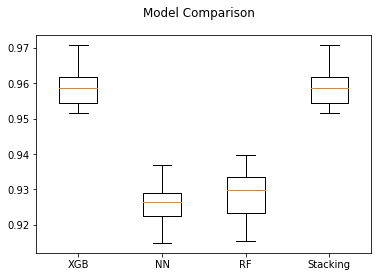

In [13]:
from sklearn import model_selection

# Source: https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/

RANDOM_SEED = 42

# append each model into a list
models = []

models.append(('XGB', clf_xgb))
models.append(('NN', clf_nn))
models.append(('RF', clf_rf))
models.append(('Stacking', clf_stckd))


# evaluate the models through iteration
results = []
model_names = []
scoring = 'accuracy'

for name, model in models:
	kfold = model_selection.RepeatedStratifiedKFold(n_splits=10,  n_repeats=3, random_state=RANDOM_SEED)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring, n_jobs=-1)
	results.append(cv_results)
	model_names.append(name)
	msg = "%s: %f (%f)" % (model_names, cv_results.mean(), cv_results.std())
	print(msg)
	
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(model_names)
plt.show()

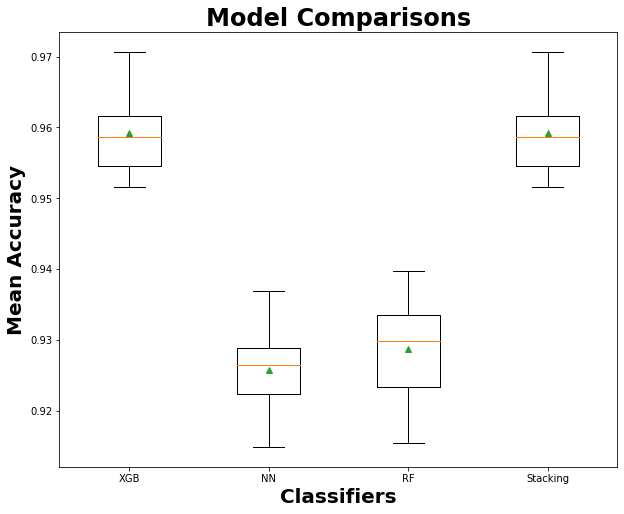

In [14]:
# plot model performance for comparison
plt.figure(figsize=(10,8))
plt.title("Model Comparisons", fontweight='bold', fontsize=24)
plt.ylabel('Mean Accuracy', fontweight='bold', fontsize=20)
plt.xlabel('Classifiers', fontweight='bold', fontsize=20)
plt.boxplot(results, labels=model_names, showmeans=True)
plt.savefig('model_comp.png')
plt.show()

In [17]:
results_extended = results.copy() 
model_names_extended = model_names.copy() 

sep_stack_cv_res = np.array([0.9825352112676057,
 0.9740845070422535,
 0.9780281690140845,
 0.9785915492957746,
 0.9785915492957746,
 0.976338028169014,
 0.9729425028184893,
 0.9780157835400225,
 0.9785794813979707,
 0.97576099210823,
 0.9712676056338028,
 0.9780281690140845,
 0.9802816901408451,
 0.9746478873239437,
 0.9808450704225352,
 0.976338028169014,
 0.9780157835400225,
 0.9780157835400225,
 0.9791431792559189,
 0.9735062006764374,
 0.976338028169014,
 0.9780281690140845,
 0.9791549295774647,
 0.971830985915493,
 0.9723943661971831,
 0.967887323943662,
 0.9870349492671928,
 0.9830890642615558,
 0.979706877113867,
 0.9825253664036077])

int_stack_cv_res = np.array([0.9887323943661972,
 0.9870422535211267,
 0.9881690140845071,
 0.9870422535211267,
 0.9808450704225352,
 0.9915492957746479,
 0.9904171364148816,
 0.9870349492671928,
 0.9875986471251409,
 0.9853438556933484,
 0.9904225352112676,
 0.9892957746478873,
 0.9887323943661972,
 0.9926760563380281,
 0.9904225352112676,
 0.9870422535211267,
 0.9870349492671928,
 0.9842164599774521,
 0.9926719278466741,
 0.9909808342728298,
 0.9943661971830986,
 0.9881690140845071,
 0.9864788732394366,
 0.9904225352112676,
 0.9915492957746479,
 0.9898591549295774,
 0.9943630214205186,
 0.9904171364148816,
 0.9892897406989853,
 0.9915445321307779])

results_extended.append(sep_stack_cv_res)
results_extended.append(int_stack_cv_res)
model_names_extended.append('Separated_Stacked')
model_names_extended.append('Integrated_Stacked')

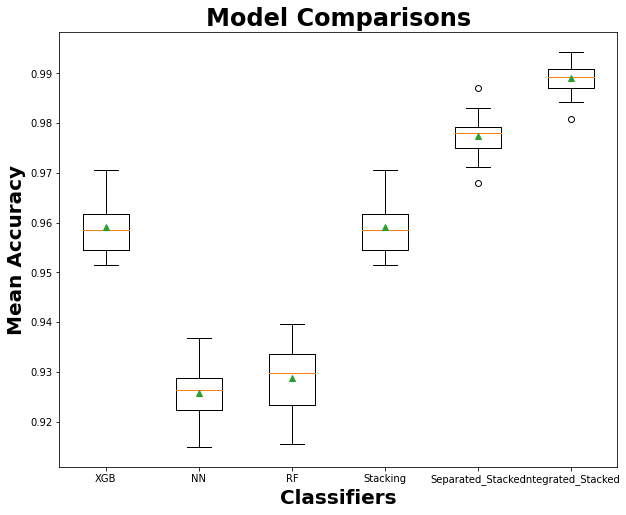

In [20]:
# plot model performance for comparison
plt.figure(figsize=(10,8))
plt.title("Model Comparisons", fontweight='bold', fontsize=24)
plt.ylabel('Mean Accuracy', fontweight='bold', fontsize=20)
plt.xlabel('Classifiers', fontweight='bold', fontsize=20)
plt.boxplot(results_extended, labels=model_names_extended, showmeans=True)
plt.savefig('model_comp_2.png')
plt.show()

### 7.3. Paired t-test 5x2 CV

In [28]:
## Source: http://rasbt.github.io/mlxtend/api_subpackages/mlxtend.evaluate/#paired_ttest_5x2cv

from mlxtend.evaluate import paired_ttest_5x2cv

# check if difference between algorithms is real
t, p = paired_ttest_5x2cv(estimator1=clf_xgb, estimator2=clf_nn, X=X, y=y, scoring='accuracy', random_seed=42)

# summarize
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))

# interpret the result
if p <= 0.05:
    print('Difference between mean performance is probably real')
else:
    print('Algorithms probably have the same performance')

Epoch 1/200
8873/8873 [==============================] - 0s 44us/step - loss: 0.6923 - accuracy: 0.5338
Epoch 2/200
8873/8873 [==============================] - 0s 26us/step - loss: 0.6920 - accuracy: 0.5419
Epoch 3/200
8873/8873 [==============================] - 0s 26us/step - loss: 0.6916 - accuracy: 0.5600
Epoch 4/200
8873/8873 [==============================] - 0s 26us/step - loss: 0.6911 - accuracy: 0.5706
Epoch 5/200
8873/8873 [==============================] - 0s 26us/step - loss: 0.6906 - accuracy: 0.5862
Epoch 6/200
8873/8873 [==============================] - 0s 26us/step - loss: 0.6900 - accuracy: 0.6054
Epoch 7/200
8873/8873 [==============================] - 0s 26us/step - loss: 0.6896 - accuracy: 0.6025
Epoch 8/200
8873/8873 [==============================] - 0s 25us/step - loss: 0.6888 - accuracy: 0.6205
Epoch 9/200
8873/8873 [==============================] - 0s 26us/step - loss: 0.6885 - accuracy: 0.6244
Epoch 10/200
8873/8873 [==============================] - 0s 26u

In [29]:
## Source: http://rasbt.github.io/mlxtend/api_subpackages/mlxtend.evaluate/#paired_ttest_5x2cv

from mlxtend.evaluate import paired_ttest_5x2cv

# check if difference between algorithms is real
t, p = paired_ttest_5x2cv(estimator1=clf_xgb, estimator2=clf_rf, X=X, y=y, scoring='accuracy', random_seed=42)

# summarize
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))

# interpret the result
if p <= 0.05:
    print('Difference between mean performance is probably real')
else:
    print('Algorithms probably have the same performance')

P-value: 0.002, t-Statistic: 5.875
Difference between mean performance is probably real


In [16]:
## Source: http://rasbt.github.io/mlxtend/api_subpackages/mlxtend.evaluate/#paired_ttest_5x2cv

from mlxtend.evaluate import paired_ttest_5x2cv

# check if difference between algorithms is real
t, p = paired_ttest_5x2cv(estimator1=clf_rf, estimator2=clf_nn, X=X, y=y, scoring='accuracy', random_seed=42)

# summarize
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))

# interpret the result
if p <= 0.05:
    print('Difference between mean performance is probably real')
else:
    print('Algorithms probably have the same performance')

Epoch 1/200
8873/8873 [==============================] - 0s 53us/step - loss: 0.6924 - accuracy: 0.5237
Epoch 2/200
8873/8873 [==============================] - 0s 29us/step - loss: 0.6922 - accuracy: 0.5374
Epoch 3/200
8873/8873 [==============================] - 0s 28us/step - loss: 0.6918 - accuracy: 0.5388
Epoch 4/200
8873/8873 [==============================] - 0s 28us/step - loss: 0.6912 - accuracy: 0.5646
Epoch 5/200
8873/8873 [==============================] - 0s 30us/step - loss: 0.6911 - accuracy: 0.5600
Epoch 6/200
8873/8873 [==============================] - 0s 31us/step - loss: 0.6905 - accuracy: 0.5743
Epoch 7/200
8873/8873 [==============================] - 0s 30us/step - loss: 0.6901 - accuracy: 0.5891
Epoch 8/200
8873/8873 [==============================] - 0s 32us/step - loss: 0.6898 - accuracy: 0.5829
Epoch 9/200
8873/8873 [==============================] - 0s 31us/step - loss: 0.6889 - accuracy: 0.6095
Epoch 10/200
8873/8873 [==============================] - 0s 32u

In [ ]:
## Source: http://rasbt.github.io/mlxtend/api_subpackages/mlxtend.evaluate/#paired_ttest_5x2cv

from mlxtend.evaluate import paired_ttest_5x2cv

# check if difference between algorithms is real
t, p = paired_ttest_5x2cv(estimator1=clf_xgb, estimator2=clf_stckd, X=X, y=y, scoring='accuracy', random_seed=42)

# summarize
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))

# interpret the result
if p <= 0.05:
    print('Difference between mean performance is probably real')
else:
    print('Algorithms probably have the same performance')

### 7.4. Model Evaluation

#### 7.4.1 Define Functions

In [9]:
## Define a function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix'):
    """
    This function prints and plots the confusion matrix.
    source: http://rasbt.github.io/mlxtend/user_guide/evaluate/confusion_matrix/
    """
    import itertools
    plt.rcParams.update({'font.size': 30})
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title, fontweight='bold', fontsize=24)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=15)
    plt.yticks(tick_marks, classes, fontsize=15)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontweight='bold', fontsize=20)
    plt.xlabel('Predicted label', fontweight='bold', fontsize=20)
    plt.tight_layout()

## Functions to compute and plot ROC, AUC
def make_ROC(data_actual, data_predict):
    """
    Function to compute ROC. Takes two
    parameters: first is actual scores,
    and second is predicted scores.
    """
    N=len(data_actual)

    TPF=[]
    FPF=[]
    threshold=0
    j=0
    increment=1/N

    while(threshold<=1.1):
        #threshold=i
        TP, FP, TN, FN = 0, 0, 0, 0
        # Accumulate the true/false negative/positives
        for j in range(N):
            if data_actual[j]==1:
                if data_predict[j]>=threshold:
                    TP+=1
                else:
                    FN+=1
            if data_actual[j]==0:
                if data_predict[j]>=threshold:
                    FP+=1
                else:
                    TN+=1

        # Calcualate true positive rate for current threshold.           
        TP_Rate=TP/(TP + FN)

        # Calcualate false positive rate for current threshold. 
        FP_Rate=FP/(FP + TN)

        TPF.append(TP_Rate)
        FPF.append(FP_Rate)

        threshold+=increment

    return TPF, FPF

def plot_ROC(data_actual, data_predict, fig_name=""):
    """
    Function to make ROC curve plot. Takes false
    positive rate and true positive rates list as
    parameters.
    """
    # Get True Positive Rate and False Positive Rate lists
    TPF, FPF = make_ROC(data_actual, data_predict)
    auc = -1 * np.trapz(TPF, FPF)
    # Plot the ROC curve
    fig = plt.figure(figsize=(10,8))
    plt.title('ROC Curve')
    plt.plot(FPF, TPF, marker='.', label='ROC Curve')
    plt.plot([0, 1], ls="--", label='Random Classifier')
    plt.title('ROC Curve (AUC = %.2f)'%auc, fontweight='bold')
    plt.xlabel('False Positive Rate (FPR)', fontweight='bold')
    plt.ylabel('True Positive Rate (TPR)', fontweight='bold')
    plt.savefig(fig_name)
    plt.legend()
    plt.show()

#### 7.4.2. Fit the Models

In [23]:
from sklearn import metrics
from sklearn.metrics import classification_report

seed = 7
np.random.seed(seed)

# XGBoost
clf_xgb.fit(X_train,y_train)
y_pred_xgb = clf_xgb.predict(X_test)
print('XGBoost Accuracy: ' + str(metrics.accuracy_score(y_test,y_pred_xgb)))

# NeuralNet
clf_nn.fit(X_train,y_train)
y_pred_nn = clf_nn.predict(X_test)
print('NeuralNet Accuracy: ' + str(metrics.accuracy_score(y_test,y_pred_nn)))

# Rnadom Forest
clf_rf.fit(X_train,y_train)
y_pred_rf = clf_rf.predict(X_test)
print('nadom Forest Accuracy: ' + str(metrics.accuracy_score(y_test,y_pred_rf)))

# mlxtend StackingClassifier
clf_stckd.fit(X_train,y_train)
y_pred_stckd = clf_stckd.predict(X_test)
print('mlxtend StackingClassifier Accuracy: ' + str(metrics.accuracy_score(y_test,y_pred_stckd)))

XGBoost Accuracy: 0.9552112676056338
Epoch 1/200
12776/12776 [==============================] - 1s 46us/step - loss: 0.6923 - accuracy: 0.5297
Epoch 2/200
12776/12776 [==============================] - 0s 30us/step - loss: 0.6917 - accuracy: 0.5528
Epoch 3/200
12776/12776 [==============================] - 0s 31us/step - loss: 0.6911 - accuracy: 0.5753
Epoch 4/200
12776/12776 [==============================] - 0s 34us/step - loss: 0.6904 - accuracy: 0.5883
Epoch 5/200
12776/12776 [==============================] - 0s 34us/step - loss: 0.6896 - accuracy: 0.6074
Epoch 6/200
12776/12776 [==============================] - 0s 37us/step - loss: 0.6888 - accuracy: 0.6223
Epoch 7/200
12776/12776 [==============================] - 0s 34us/step - loss: 0.6879 - accuracy: 0.6392
Epoch 8/200
12776/12776 [==============================] - 0s 34us/step - loss: 0.6870 - accuracy: 0.6569
Epoch 9/200
12776/12776 [==============================] - 0s 35us/step - loss: 0.6856 - accuracy: 0.6678
Epoch 10/

In [10]:
# mlxtend StackingClassifier
clf_stckd.fit(X_train,y_train)
y_pred_stckd = clf_stckd.predict(X_test)
print('mlxtend StackingClassifier Accuracy: ' + str(metrics.accuracy_score(y_test,y_pred_stckd)))

Fitting 2 classifiers...
Fitting classifier1: xgbclassifier (1/2)
Fitting classifier2: kerasclassifier (2/2)
Epoch 1/200
12776/12776 [==============================] - 0s 37us/step - loss: 0.6923 - accuracy: 0.5297
Epoch 2/200
12776/12776 [==============================] - 0s 27us/step - loss: 0.6917 - accuracy: 0.5528
Epoch 3/200
12776/12776 [==============================] - 0s 27us/step - loss: 0.6911 - accuracy: 0.5753
Epoch 4/200
12776/12776 [==============================] - 0s 27us/step - loss: 0.6904 - accuracy: 0.5883
Epoch 5/200
12776/12776 [==============================] - 0s 28us/step - loss: 0.6896 - accuracy: 0.6074
Epoch 6/200
12776/12776 [==============================] - 0s 29us/step - loss: 0.6888 - accuracy: 0.6223
Epoch 7/200
12776/12776 [==============================] - 0s 27us/step - loss: 0.6879 - accuracy: 0.6392
Epoch 8/200
12776/12776 [==============================] - 0s 27us/step - loss: 0.6870 - accuracy: 0.6569
Epoch 9/200
12776/12776 [==================

NameError: name 'metrics' is not defined

#### 7.4.3 Evaluate the Models

##### 7.4.3.1 XGBoost Evaluation

[[1670  105]
 [  54 1721]]


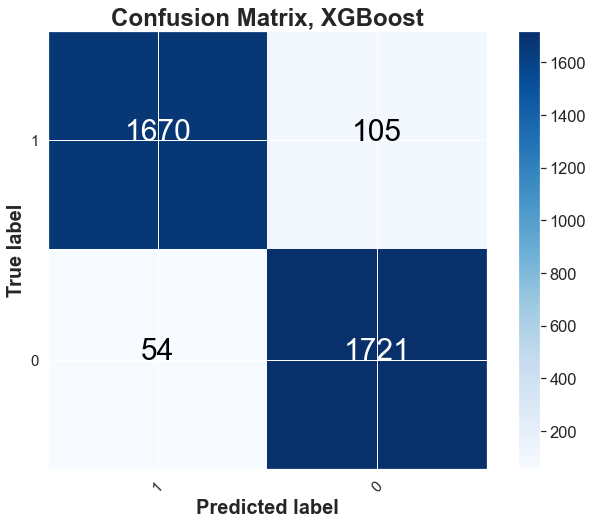

In [32]:
from sklearn.metrics import confusion_matrix
## Compute and plot the confusion matrix for the XGBoost model
cm_xgb = confusion_matrix(y_test, y_pred_xgb.round(), labels=[1, 0])
print(cm_xgb)
plt.figure(figsize=(10,8))
plot_confusion_matrix(cm_xgb, classes=[1, 0],
                      title='Confusion Matrix, XGBoost')
plt.savefig('cm_xgb.png')

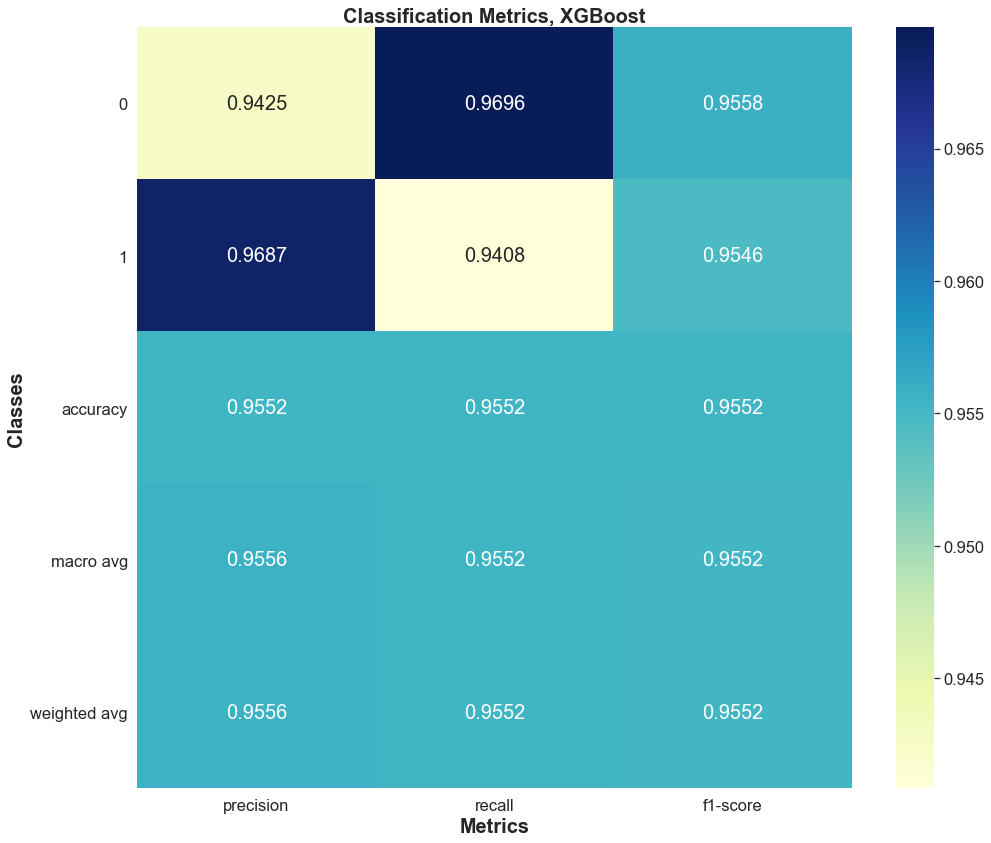

In [28]:
import seaborn as sns
## Compute and plot the classification metrics for the XGBoost model
report_xgb = classification_report(y_test, y_pred_xgb.round(), output_dict=True)
report_xgb = pd.DataFrame(report_xgb).transpose()
# report_xgb.to_csv ("//Users/kivanc/DataMining-ML/Projects/MiniProject2/report_ANN.csv", index = True, header=True)

plt.figure(figsize=(16,14))
sns.set(font_scale=1.5)
fig_class = sns.heatmap(pd.DataFrame(report_xgb).iloc[:, :-1], annot=True, cmap="YlGnBu", fmt=".4g", annot_kws={'size':20})
plt.title("Classification Metrics, XGBoost", fontweight='bold', fontsize=20)
plt.xlabel('Metrics', fontweight='bold', fontsize=20) # x-axis label with fontsize 15
plt.ylabel('Classes', fontweight='bold', fontsize=20) # y-axis label with fontsize 15
plt.yticks(rotation=0)
plt.savefig('metrics_xgb.png')

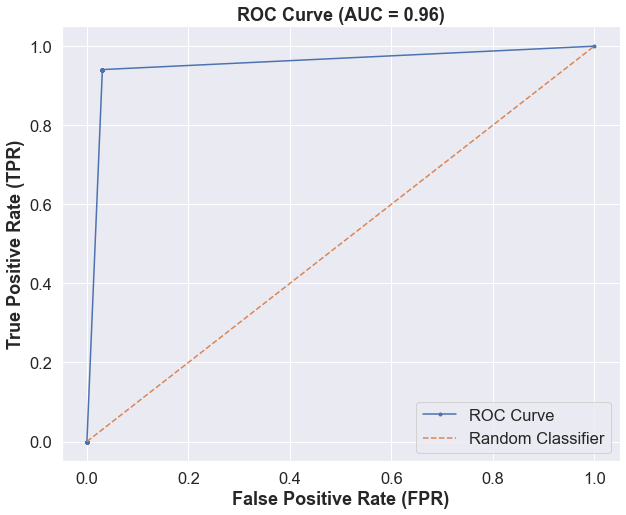

In [29]:
## Plot the ROC curve for the XGBoost model
plot_ROC(y_test, y_pred_xgb, fig_name="roc_xgb.png")

##### 7.4.3.2 NeuralNet Evaluation

[[1616  159]
 [ 120 1655]]


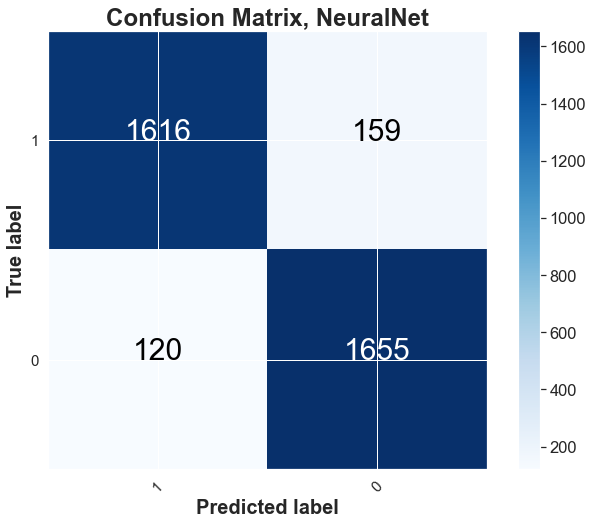

In [30]:
## Compute and plot the confusion matrix for the NeuralNet model
cm_nn = confusion_matrix(y_test, y_pred_nn.round(), labels=[1, 0])
print(cm_nn)
plt.figure(figsize=(10,8))
plot_confusion_matrix(cm_nn, classes=[1, 0],
                      title='Confusion Matrix, NeuralNet')
plt.savefig('cm_nn.png')

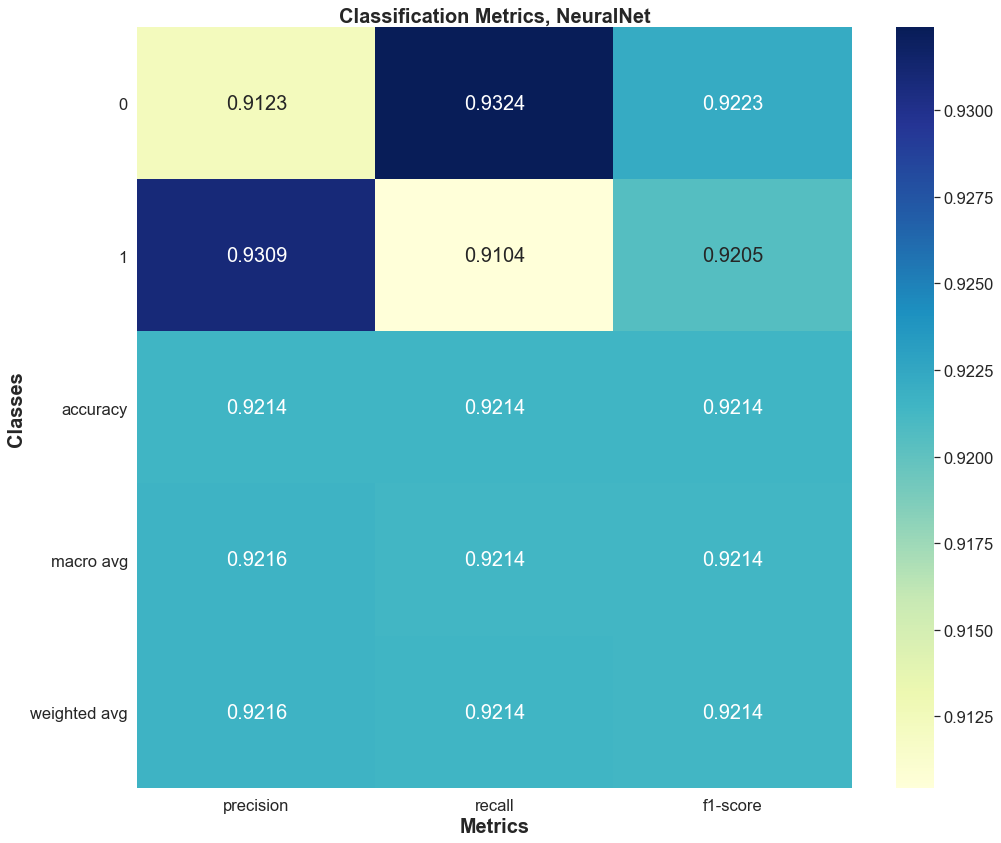

In [33]:
## Compute and plot the classification metrics for the NeuralNet model
report_nn = classification_report(y_test, y_pred_nn.round(), output_dict=True)
report_nn = pd.DataFrame(report_nn).transpose()

plt.figure(figsize=(16,14))
sns.set(font_scale=1.5)
fig_class = sns.heatmap(pd.DataFrame(report_nn).iloc[:, :-1], annot=True, cmap="YlGnBu", fmt=".4g", annot_kws={'size':20})
plt.title("Classification Metrics, NeuralNet", fontweight='bold', fontsize=20)
plt.xlabel('Metrics', fontweight='bold', fontsize=20) # x-axis label with fontsize 15
plt.ylabel('Classes', fontweight='bold', fontsize=20) # y-axis label with fontsize 15
plt.yticks(rotation=0)
plt.savefig('metrics_nn.png')

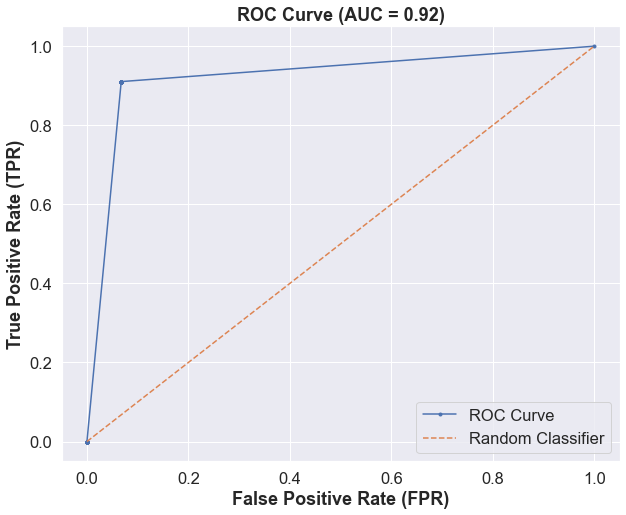

In [34]:
## Plot the ROC curve for the NeuralNet model
plot_ROC(y_test, y_pred_nn, fig_name="roc_nn.png")

##### 7.4.3.3 Random Forest Evaluation

[[1625  150]
 [  97 1678]]


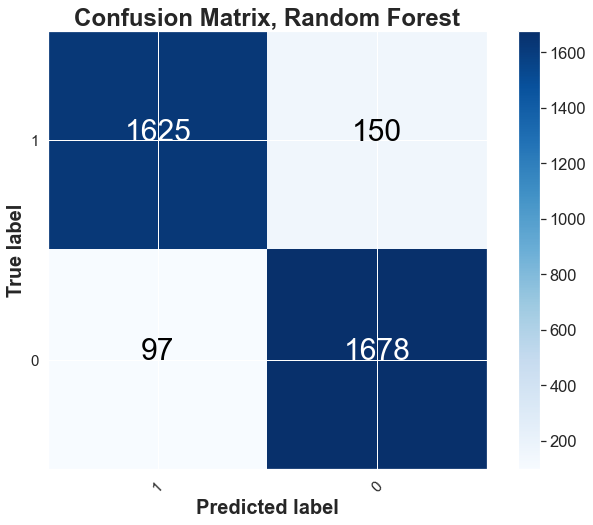

In [35]:
## Compute and plot the confusion matrix for the Random Forest model
cm_rf = confusion_matrix(y_test, y_pred_rf.round(), labels=[1, 0])
print(cm_rf)
plt.figure(figsize=(10,8))
plot_confusion_matrix(cm_rf, classes=[1, 0],
                      title='Confusion Matrix, Random Forest')
plt.savefig('cm_rf.png')

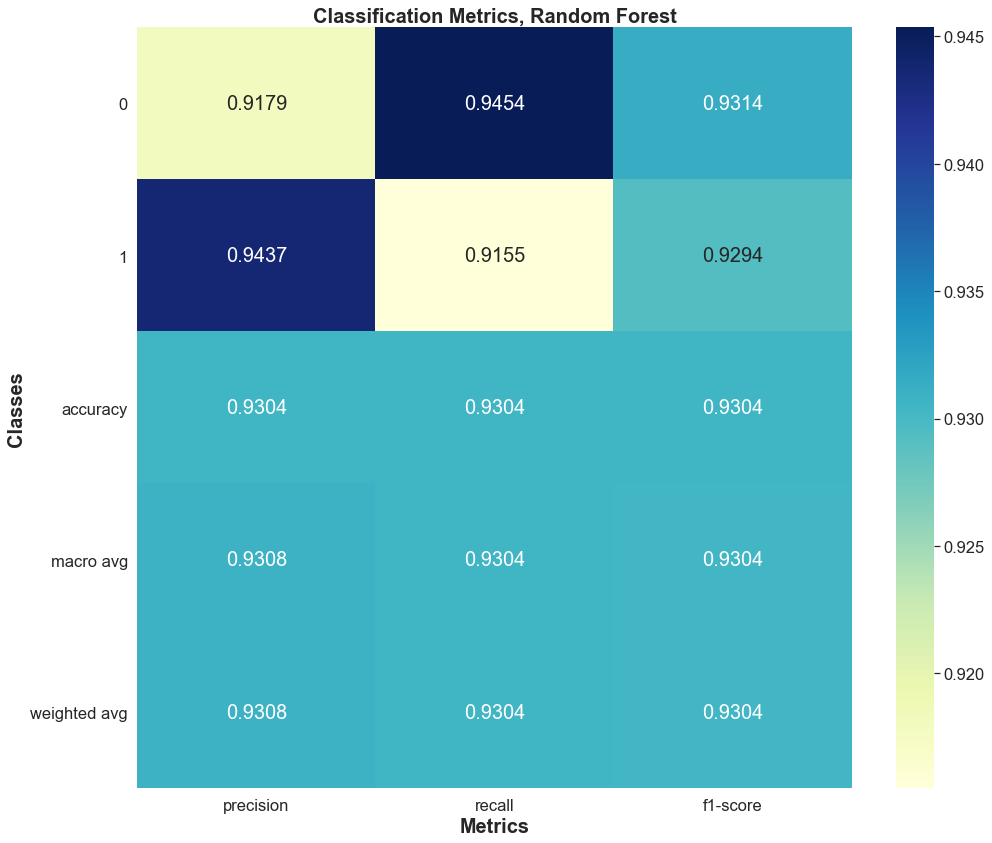

In [36]:
## Compute and plot the classification metrics for the Random Forest model
report_rf = classification_report(y_test, y_pred_rf.round(), output_dict=True)
report_rf = pd.DataFrame(report_rf).transpose()

plt.figure(figsize=(16,14))
sns.set(font_scale=1.5)
fig_class = sns.heatmap(pd.DataFrame(report_rf).iloc[:, :-1], annot=True, cmap="YlGnBu", fmt=".4g", annot_kws={'size':20})
plt.title("Classification Metrics, Random Forest", fontweight='bold', fontsize=20)
plt.xlabel('Metrics', fontweight='bold', fontsize=20) # x-axis label with fontsize 15
plt.ylabel('Classes', fontweight='bold', fontsize=20) # y-axis label with fontsize 15
plt.yticks(rotation=0)
plt.savefig('metrics_rf.png')

In [ ]:
## Plot the ROC curve for the Random Forest model
plot_ROC(y_test, y_pred_rf, fig_name="roc_rf.png")

##### 7.4.3.1 mlxtend StackingClassifier Evaluation

[[1670  105]
 [  54 1721]]


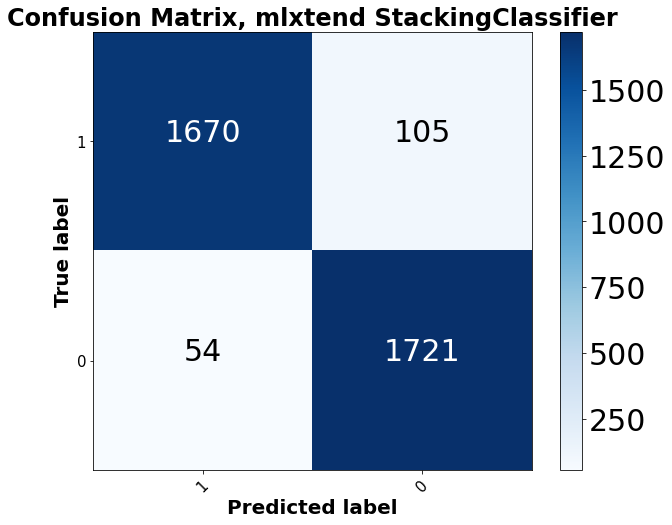

In [12]:
from sklearn.metrics import confusion_matrix
## Compute and plot the confusion matrix for the mlxtend StackingClassifier
cm_stckd = confusion_matrix(y_test, y_pred_stckd.round(), labels=[1, 0])
print(cm_stckd)
plt.figure(figsize=(10,8))
plot_confusion_matrix(cm_stckd, classes=[1, 0],
                      title='Confusion Matrix, mlxtend StackingClassifier')
plt.savefig('cm_stckd.png')

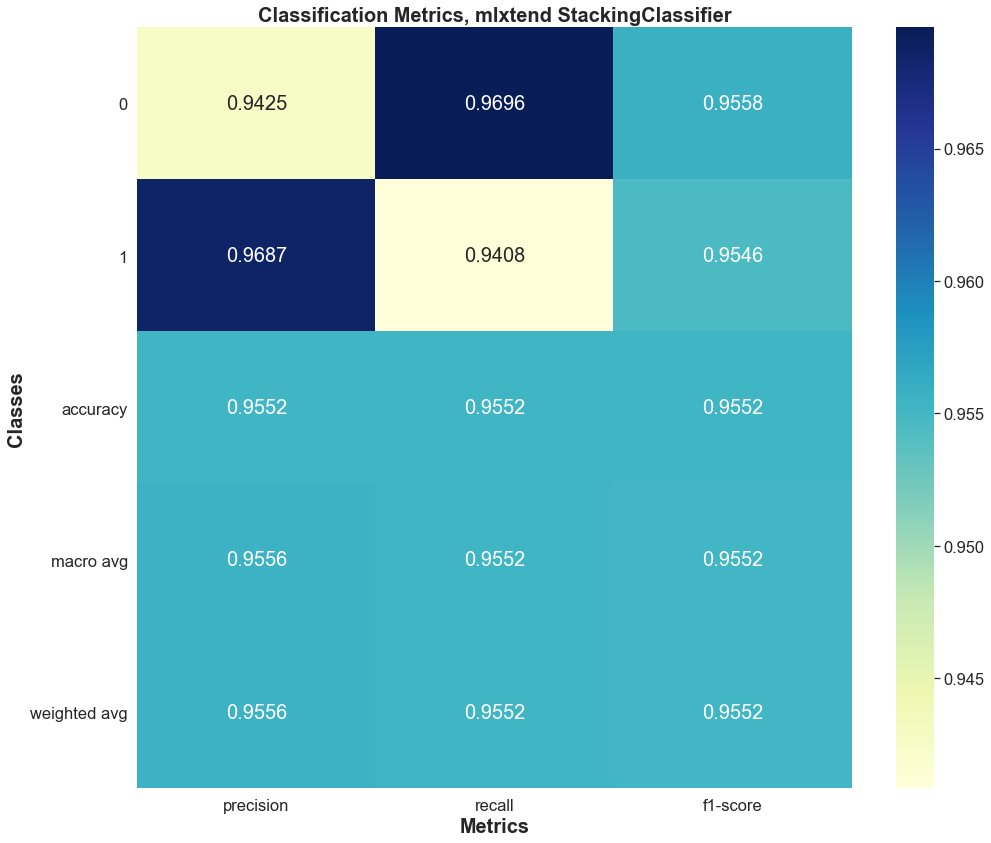

In [14]:
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report
## Compute and plot the classification metrics for the mlxtend StackingClassifier 
report_stckd = classification_report(y_test, y_pred_stckd.round(), output_dict=True)
report_stckd = pd.DataFrame(report_stckd).transpose()

plt.figure(figsize=(16,14))
sns.set(font_scale=1.5)
fig_class = sns.heatmap(pd.DataFrame(report_stckd).iloc[:, :-1], annot=True, cmap="YlGnBu", fmt=".4g", annot_kws={'size':20})
plt.title("Classification Metrics, mlxtend StackingClassifier", fontweight='bold', fontsize=20)
plt.xlabel('Metrics', fontweight='bold', fontsize=20) # x-axis label with fontsize 15
plt.ylabel('Classes', fontweight='bold', fontsize=20) # y-axis label with fontsize 15
plt.yticks(rotation=0)
plt.savefig('metrics_stckd.png')

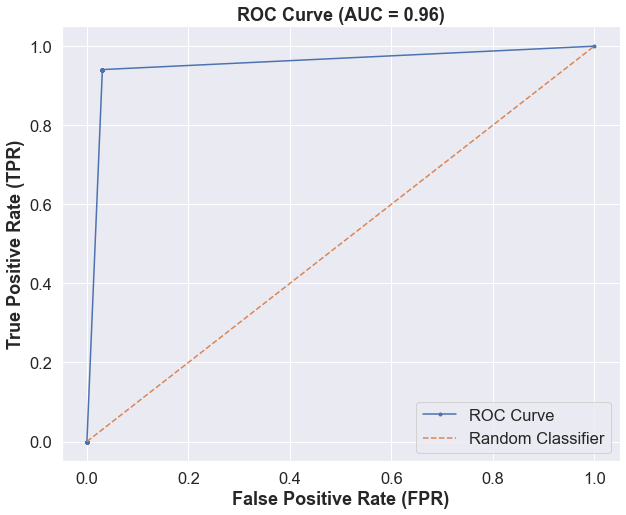

In [15]:
## Plot the ROC curve for the mlxtend StackingClassifier
plot_ROC(y_test, y_pred_stckd, fig_name="roc_stckd.png")